# GAUSSIAN MIXTURE MODEL

## Ví dụ 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
# Thư viện chứa model Gaussian Mixture

In [9]:
data = pd.read_csv("shopping-data.csv",
                   header=0,
                   index_col=0)
print(data.shape)
data.head()

(200, 4)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values

# Chuẩn hoá dữ liệu
std = MinMaxScaler()
X_std = std.fit_transform(X)
print(X_std.shape)

(200, 2)


In [4]:
# Khởi tạo đối tượng mô hình GaussianMixture
gm = GaussianMixture(n_components=5,
                     covariance_type='full',
                     random_state=0)

gm.fit(X_std)
print('means: \n', gm.means_)
print('covariances: \n ', gm.covariances_)

means: 
 [[0.60502531 0.15433196]
 [0.33368985 0.49394756]
 [0.58393969 0.82673863]
 [0.0829305  0.80743088]
 [0.09861098 0.21597752]]
covariances: 
  [[[ 0.01818446  0.00433814]
  [ 0.00433814  0.00873064]]

 [[ 0.00613567 -0.00231927]
  [-0.00231927  0.0051635 ]]

 [[ 0.01808598 -0.00031096]
  [-0.00031096  0.0091568 ]]

 [[ 0.00337483 -0.0001437 ]
  [-0.0001437   0.01026088]]

 [[ 0.00453005  0.00255303]
  [ 0.00255303  0.01918353]]]


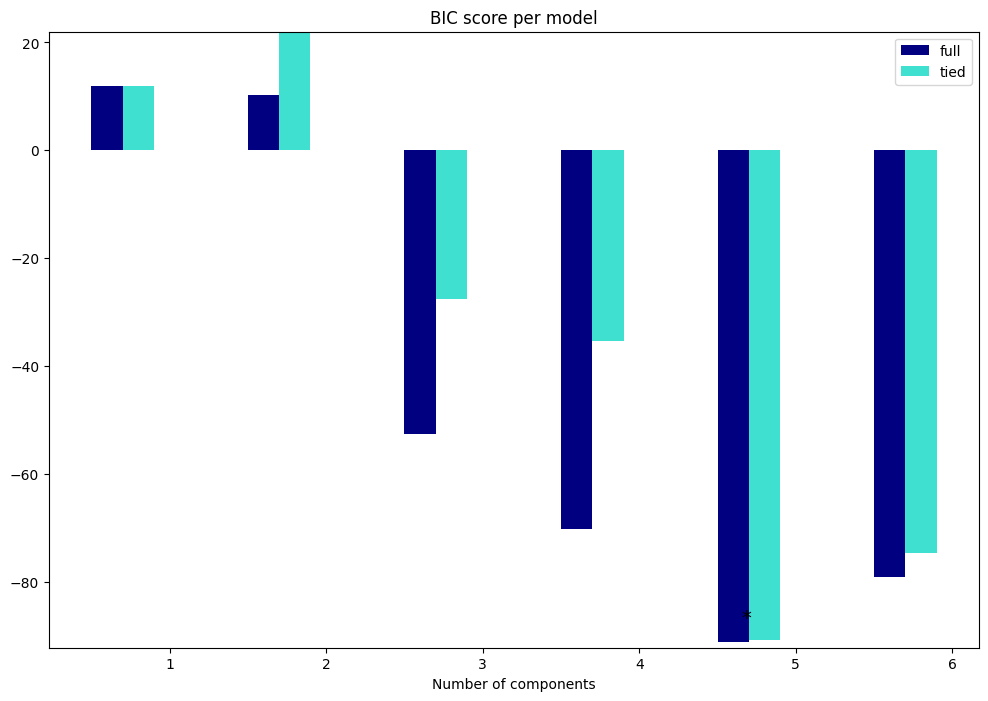

In [5]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
# cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['full', 'tied']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit Gaussian mixture theo phương pháp huấn luyện EM
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type)
        gmm.fit(X_std)
        bic.append(gmm.bic(X_std))
        # Gán model có BIC scores thấp nhất là model tốt nhất
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
        
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm
bars = []

# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + \
        .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

In [6]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40,
                    c=palette[labels.astype(int)])
    
    # thêm nhãn cho mỗi cluster
    txts = []
    
    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

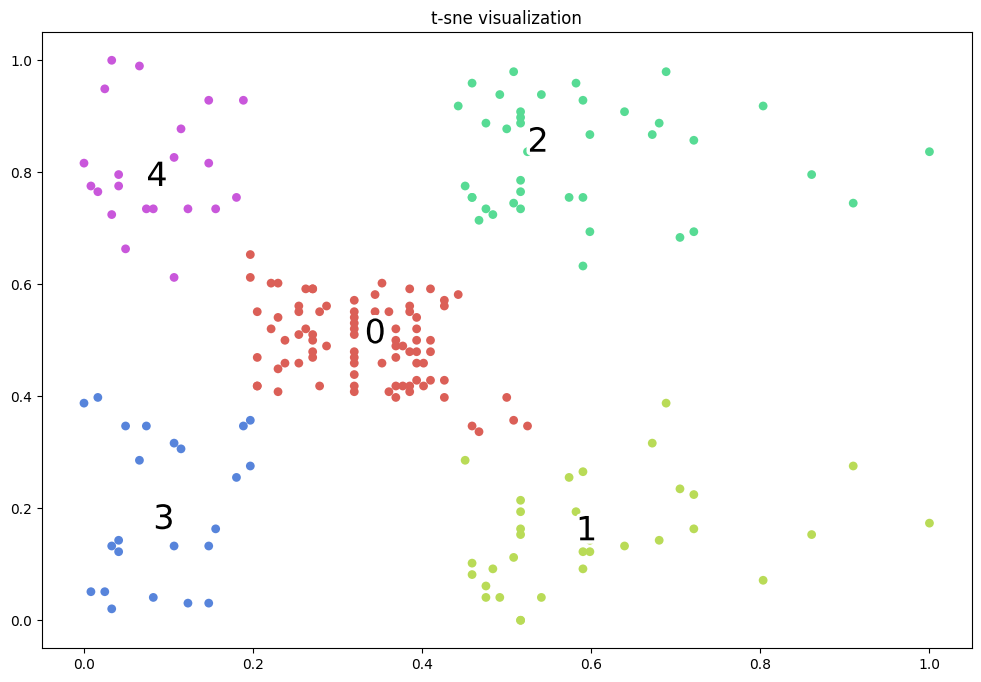

In [7]:
labels = best_gmm.predict(X_std)
_plot_kmean_scatter(X_std, labels)

## Ví dụ mở rộng

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
# Thư viện chứa model Gaussian Mixture

In [102]:
data = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv",
                   index_col=0)

print(data.shape)
data

(811, 106)


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
Product_Code,,,,,,,,,,,,,,,,,,,,,
P1,11,12,10,8,13,12,14,21,6,14,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
P2,7,6,3,2,7,1,6,3,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
P3,7,11,8,9,10,8,7,13,12,6,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
P4,12,8,13,5,9,6,9,13,13,11,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
P5,8,5,13,11,6,7,9,14,9,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P815,0,0,1,0,0,2,1,0,0,1,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
P816,0,1,0,0,1,2,2,6,0,1,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
P817,1,0,0,0,1,1,2,1,1,0,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75


In [117]:
X = data.iloc[:, :52].values
print(X.shape)
X

(811, 52)


array([[11, 12, 10, ...,  6,  5, 10],
       [ 7,  6,  3, ...,  1,  6,  0],
       [ 7, 11,  8, ...,  8,  8,  7],
       ...,
       [ 1,  0,  0, ...,  0,  4,  3],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  1,  0, ...,  0,  0,  1]])

In [118]:
std = MinMaxScaler()
X_std = std.fit_transform(X)
print(X_std.shape)

(811, 52)


In [119]:
# Khởi tạo đối tượng mô hình GaussianMixture
gm = GaussianMixture(n_components=5,
                     covariance_type='full',
                     random_state=42)

gm.fit(X_std)
print('means: \n', gm.means_)
print('covariances: \n ', gm.covariances_)

means: 
 [[0.12018097 0.12322071 0.1176679  0.11460366 0.11315012 0.13323946
  0.12346188 0.11514505 0.10983358 0.1344161  0.12288448 0.12483759
  0.11746022 0.12433158 0.12668016 0.12238373 0.11306651 0.10838062
  0.12838015 0.12367431 0.10885057 0.12298486 0.14353351 0.10659359
  0.1327923  0.12963486 0.11007852 0.11197005 0.11833729 0.12175427
  0.11121591 0.11879852 0.11198878 0.12069984 0.12508526 0.1281985
  0.10359602 0.12397031 0.11333881 0.12142854 0.11931239 0.11833961
  0.11284504 0.12085089 0.13156279 0.13256713 0.11204595 0.13131178
  0.12783202 0.13431351 0.12909875 0.11658146]
 [0.61580247 0.64427673 0.65047619 0.62711864 0.58907104 0.67666667
  0.65047619 0.5827957  0.60275132 0.69358974 0.66261905 0.63251462
  0.60393443 0.66739394 0.63415205 0.65333333 0.61032258 0.5359204
  0.65356725 0.63714286 0.56270833 0.59310345 0.70222222 0.46981481
  0.496875   0.38958333 0.53623188 0.5648227  0.64393939 0.66190476
  0.61388889 0.58950355 0.60462585 0.6684058  0.63652174 0.632

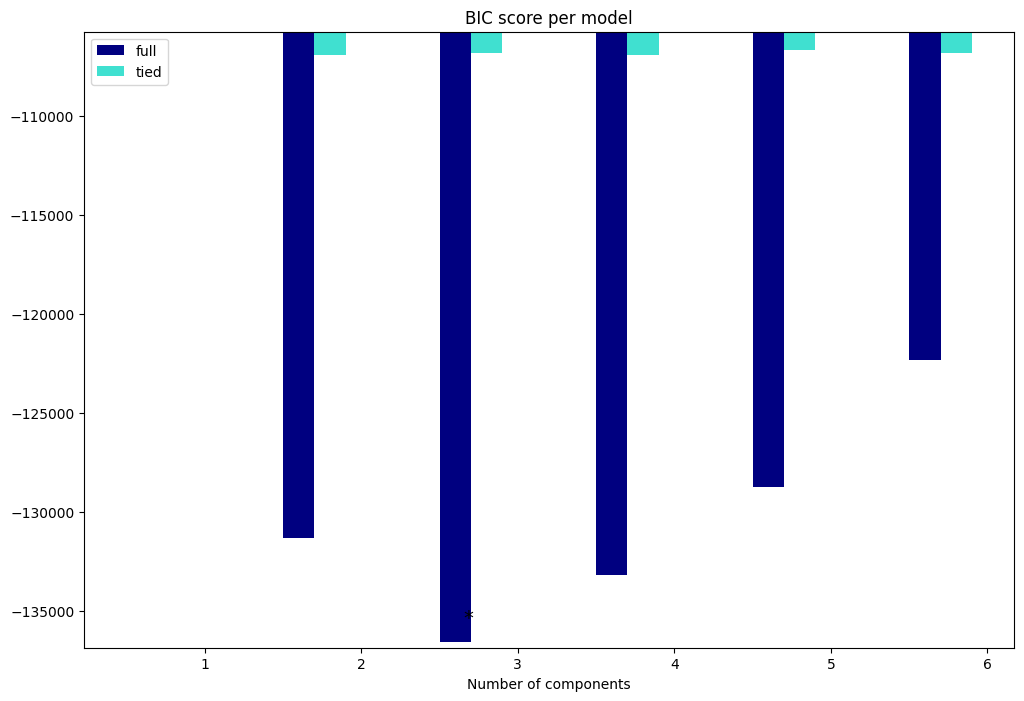

In [120]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
# cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['full', 'tied']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit Gaussian mixture theo phương pháp huấn luyện EM
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type)
        gmm.fit(X_std)
        bic.append(gmm.bic(X_std))
        # Gán model có BIC scores thấp nhất là model tốt nhất
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
        
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm
bars = []

# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + \
        .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [122]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40,
                    c=palette[labels.astype(int)])
    
    # thêm nhãn cho mỗi cluster
    txts = []
    
    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

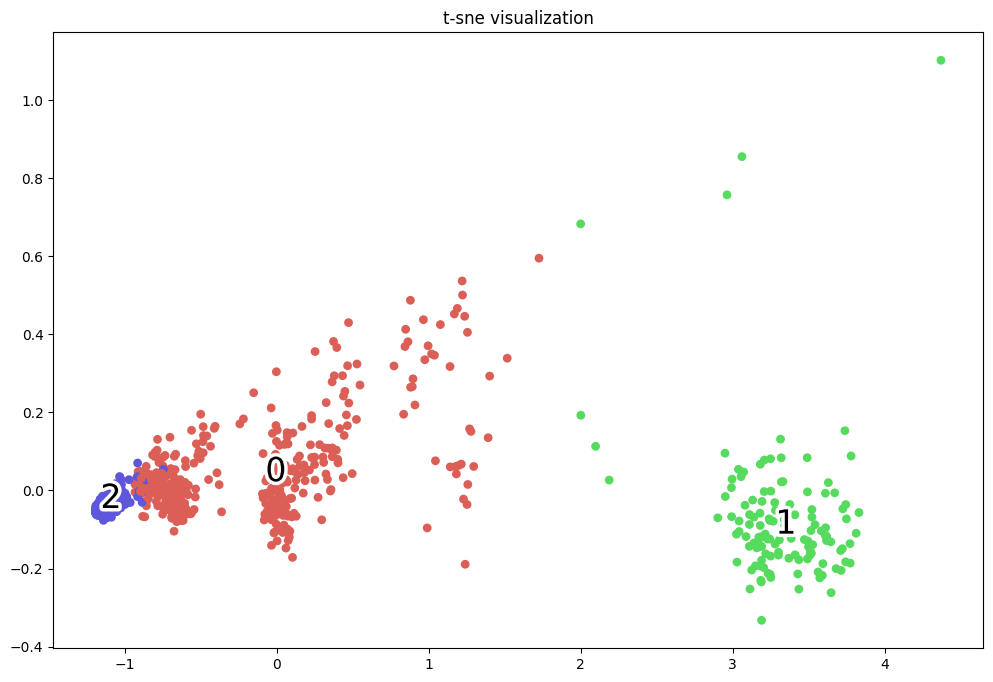

In [123]:
labels = best_gmm.predict(X_std)
_plot_kmean_scatter(X_pca, labels)